In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# import cardio_data.csv
df = pd.read_csv('Dataset/cardio_data.csv')
df



,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
#use 4 features as predictors variables
X = df[["ap_hi", "ap_lo", "cholesterol", "gluc"]]
y = df["cardio"]

In [4]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)

In [5]:
#train decision tree
clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

[[19534  5026]
 [ 8066 16374]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.75     24560
           1       0.77      0.67      0.71     24440

    accuracy                           0.73     49000
   macro avg       0.74      0.73      0.73     49000
weighted avg       0.74      0.73      0.73     49000



In [7]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8208 2253]
 [3511 7028]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     10461
           1       0.76      0.67      0.71     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.72     21000
weighted avg       0.73      0.73      0.72     21000



In [8]:
print("Accuracy without regularization:", accuracy_score(y_test, y_pred))

Accuracy without regularization: 0.7255238095238096


Accuracy with regularization: 0.7303333333333333


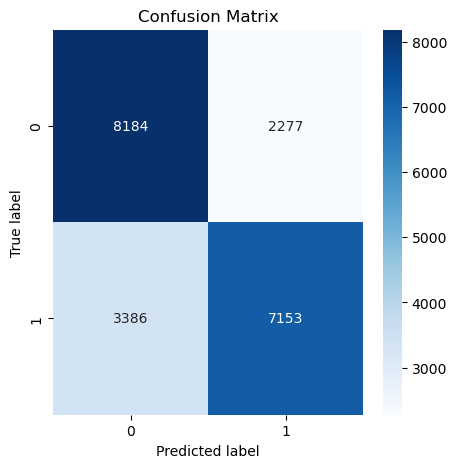

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10461
           1       0.76      0.68      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [9]:
# Train a decision tree with regularization
clf_reg = DecisionTreeClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=60, random_state=42)
clf_reg.fit(X_train, y_train)

# Predict and calculate accuracy
y_pred_reg = clf_reg.predict(X_test)
print("Accuracy with regularization:", accuracy_score(y_test, y_pred_reg))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_reg)
# Create a Confusion Matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(classification_report(y_test, y_pred_reg))

<Axes: xlabel='cardio', ylabel='smoke'>

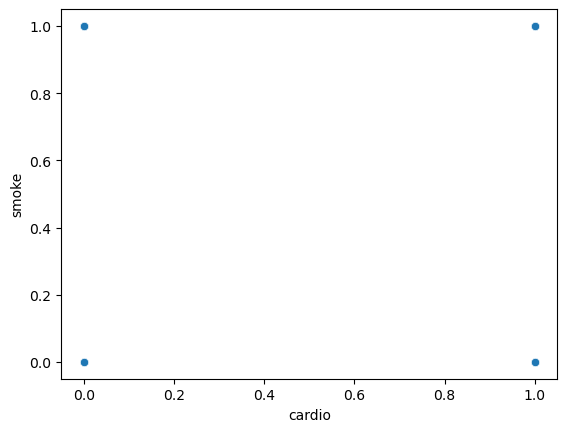

In [17]:
sns.scatterplot(data=df, x=df["cardio"], y=df["smoke"])

In [22]:
# search over a range of max_depth

params =  {    
    'max_depth': [ 3,4,5,6,7,8,9,10,15,20],'min_samples_split': [2,3,4,5,8,12,16,20],'min_samples_leaf': [10,20,30,40,50,60,70,80] }

# Create gridsearch instance

grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=5,
                    n_jobs=1,
                    verbose=2)

# Fit the model
grid.fit(X_train, y_train)

# Assess the score
grid.best_score_, grid.best_params_

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=3, m

[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=30, min_samples_split=16; total time=   0.0

[CV] END max_depth=3, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV

[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=5; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=80, min_samples_split=12; total time=   0.0s

[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[C

[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=4, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV]

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=4; total time=   0.0s
[CV]

[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=30, min_samples_split=20; total time=

[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV]

[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=10, min_samples_split=3; total time=   0.0s

[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=2; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=40, min_samples_split=2; total time=   

[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=60, min_samples_split=8; total time=   0.0s
[CV]

[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=6, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=10, min_samples_split=2; total time=   

[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=16; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=30, min_samples_split=16; total time=   0.

[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV]

[CV] END max_depth=7, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=7, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=3; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=10, min_samples_split=3; total time=   0.0s

[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=12; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=30, min_samples_split=16; total time=   0.0

[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=60, min_samples_split=5; total time=   0.0s
[CV]

[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=8, min_samples_leaf=80, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=10, min_samples_split=3; total time=   0.0

[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV]

[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=16; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=60, min_samples_split=3; total time=   0.0

[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=5; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=9, min_samples_leaf=80, min_samples_split=12; total time=   0.0s


[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=30, min_samples_split=8; total time=

[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=4; total time=

[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=80, min_samples_split=20; 

[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=30, min_samples_split=8; total time=

[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=4; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=60, min_samples_split=5; total time=

[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=15, min_samples_leaf=80, min_samples_split=16; to

[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=3; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=3; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=3; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=4; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=30, min_samples_split=5; total time=

[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=50, min_samples_split=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=3; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=60, min_samples_split=3; total 

[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=8; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=12; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=16; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=80, min_samples_split=20; 

(0.7241224489795919,
 {'max_depth': 4, 'min_samples_leaf': 60, 'min_samples_split': 2})

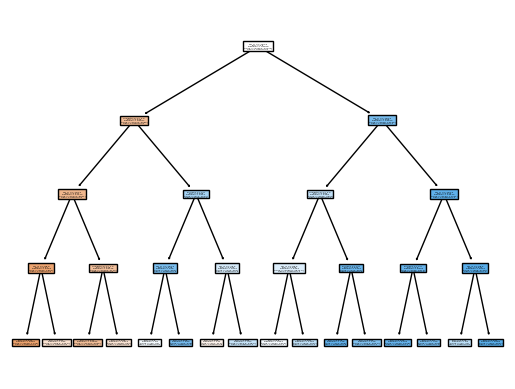

In [16]:
fn=['ap_hi','ap_lo','cholesterol','glucose']
cn=['absence-0', 'presence-1']
tree.plot_tree(clf_reg,
           feature_names = fn, 
           class_names=cn,
           filled = True);
plt.show()

<Axes: xlabel='smoke'>

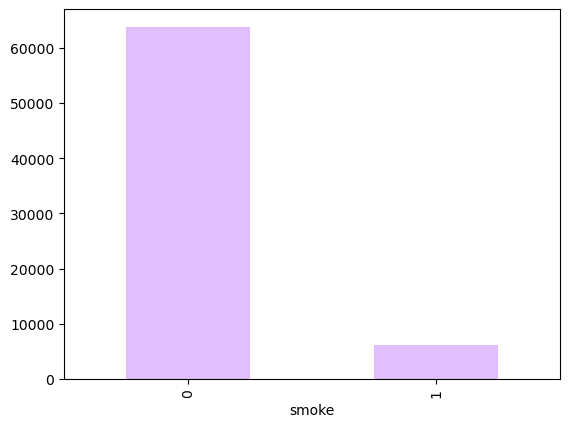

In [13]:
df['smoke'].value_counts().plot(kind='bar', color = "#E1BEFF")

<Axes: xlabel='alco'>

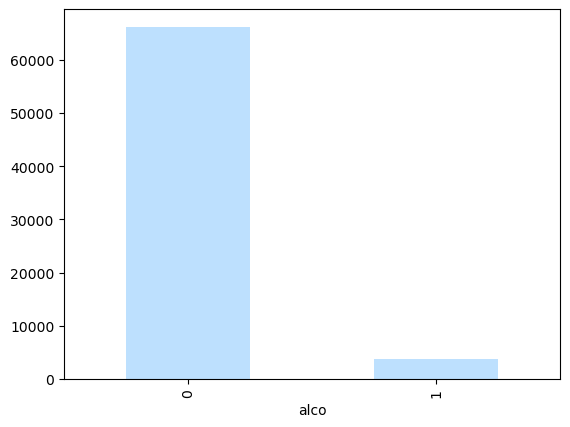

In [14]:
df['alco'].value_counts().plot(kind='bar', color = "#bde0fe")

<Axes: xlabel='active'>

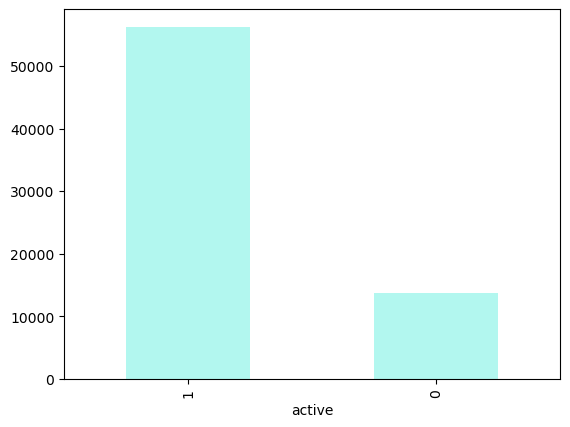

In [15]:
df['active'].value_counts().plot(kind='bar', color = '#b2f7ef')

<Axes: xlabel='cardio'>

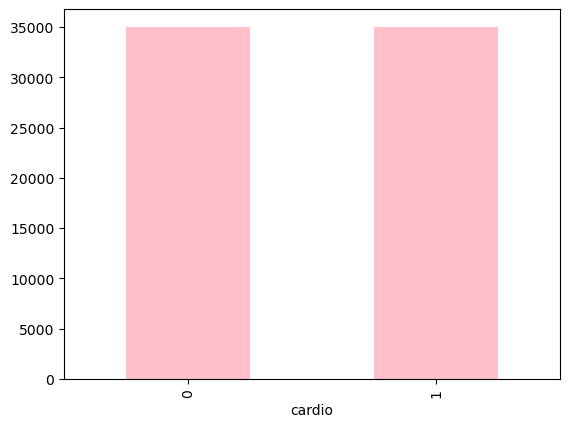

In [7]:
df['cardio'].value_counts().plot(kind='bar', color = 'pink')